# Machine Learning 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn  as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import  MinMaxScaler,LabelEncoder
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


<h3>
We decided to use logistics regression in order to produce a model which predict the success of a game.
its means: whether a game will be rated and reviewed as  Successful or not.
for example when given a new game for the model,  will the model be  able to predict according to given data, whether the game reviewed as Successful or not.
<h3>


In [2]:
gamesDataFrame = pd.read_csv("HandledData.csv",header=0,sep=',')
gamesDataFrame.head()

,Title,Release Date,ReleaseSeason,Platform,Developer,Genres,MainGenre,Rating,FirstAward,SecondAward,...,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore
0,The Legend of Zelda: Ocarina of Time,23/11/1998,3,Nintendo 64,Nintendo,"ActionAdventure,Fantasy",ActionAdventure,E,#1 Best N64 Game of 1998,#1 Most Discussed N64 Game of 1998,...,99.0,22.0,22.0,0.0,0.0,9.1,6664.0,5974.0,227.0,463.0
1,Tony Hawk's Pro Skater 2,20/09/2000,3,PlayStation,Neversoft Entertainment,"Sports,Alternative,Skateboarding",Sports,T,#1 Best PS1 Game of 2000,#4 Most Discussed PS1 Game of 2000,...,98.0,19.0,19.0,0.0,0.0,7.4,744.0,521.0,88.0,135.0
2,Grand Theft Auto IV,29/04/2008,1,PlayStation 3,Rockstar North,"ActionAdventure,Modern,Modern,Open-World",ActionAdventure,M,#1 Best PS3 Game of 2008,#2 Most Discussed PS3 Game of 2008,...,98.0,64.0,64.0,0.0,0.0,7.8,4354.0,3059.0,710.0,585.0
3,SoulCalibur,08/09/1999,3,Dreamcast,Namco,"Action,Fighting,3D",Action,T,#1 Best Dreamcast Game of 1999,#1 Most Discussed Dreamcast Game of 1999,...,98.0,24.0,24.0,0.0,0.0,8.5,361.0,298.0,25.0,38.0
4,Grand Theft Auto IV,29/04/2008,1,Xbox 360,Rockstar North,"ActionAdventure,Modern,Modern,Open-World",ActionAdventure,M,#1 Best Xbox 360 Game of 2008,#1 Most Discussed Xbox 360 Game of 2008,...,98.0,86.0,86.0,0.0,0.0,7.9,3543.0,2564.0,536.0,443.0


### Dropping unnecessary columns for predictions

In [3]:
dataFrameForML = gamesDataFrame.copy()
dataFrameForML.drop(columns=['Title', 'Release Date', 'Genres',
                    'FirstAward','SecondAward','ThirdAward'],axis=1, inplace=True)
dataFrameForML.head()


,ReleaseSeason,Platform,Developer,MainGenre,Rating,FirstPlaceAward,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore
0,3,Nintendo 64,Nintendo,ActionAdventure,E,1,99.0,22.0,22.0,0.0,0.0,9.1,6664.0,5974.0,227.0,463.0
1,3,PlayStation,Neversoft Entertainment,Sports,T,1,98.0,19.0,19.0,0.0,0.0,7.4,744.0,521.0,88.0,135.0
2,1,PlayStation 3,Rockstar North,ActionAdventure,M,1,98.0,64.0,64.0,0.0,0.0,7.8,4354.0,3059.0,710.0,585.0
3,3,Dreamcast,Namco,Action,T,1,98.0,24.0,24.0,0.0,0.0,8.5,361.0,298.0,25.0,38.0
4,1,Xbox 360,Rockstar North,ActionAdventure,M,1,98.0,86.0,86.0,0.0,0.0,7.9,3543.0,2564.0,536.0,443.0


**Our assumption is:**

* if the game has a metaScore of over 75 then it is considered as successful-rated  game. 


* first we scale the userScore column to the same scale as MetaScore column
* After the scaling, we created a new column which indicate whether game is considered as Successful Game or not

In [4]:
dataFrameForML['UserScore'] = dataFrameForML.loc[:,['UserScore']] * 10

#Assumption that a game is a successful one if its metascore is above 75
dataFrameForML['SuccessfulGame'] = (dataFrameForML['MetaScore'] >= 75)
dataFrameForML['SuccessfulGame'].replace(to_replace=[True,False],value=['GoodGame','BadGame'],inplace=True)

In [5]:
encoder = LabelEncoder()
dataFrameForML.loc[:,['SuccessfulGame']] = encoder.fit_transform(dataFrameForML['SuccessfulGame'])
dataFrameForML.loc[:,['MainGenre']] = encoder.fit_transform(dataFrameForML['MainGenre'])
dataFrameForML.loc[:,['Rating']] = encoder.fit_transform(dataFrameForML['Rating'])
dataFrameForML.loc[:,['Platform']] = encoder.fit_transform(dataFrameForML['Platform'])
dataFrameForML.loc[:,['Developer']] = encoder.fit_transform(dataFrameForML['Developer'])
dataFrameForML.head()

,ReleaseSeason,Platform,Developer,MainGenre,Rating,FirstPlaceAward,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore,SuccessfulGame
0,3,5,2676,1,1,1,99.0,22.0,22.0,0.0,0.0,91.0,6664.0,5974.0,227.0,463.0,1
1,3,8,2635,11,7,1,98.0,19.0,19.0,0.0,0.0,74.0,744.0,521.0,88.0,135.0,1
2,1,10,3323,1,4,1,98.0,64.0,64.0,0.0,0.0,78.0,4354.0,3059.0,710.0,585.0,1
3,3,2,2581,0,7,1,98.0,24.0,24.0,0.0,0.0,85.0,361.0,298.0,25.0,38.0,1
4,1,19,3323,1,4,1,98.0,86.0,86.0,0.0,0.0,79.0,3543.0,2564.0,536.0,443.0,1


,ReleaseSeason,Platform,Developer,MainGenre,Rating,FirstPlaceAward,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore,SuccessfulGame
ReleaseSeason,1.000000,0.006971,-0.003136,-0.001658,-0.009103,0.036607,0.010511,0.001625,0.007398,-0.008412,-0.010525,0.007246,-0.004373,-0.009882,0.003222,0.004430,0.009133
Platform,0.006971,1.000000,0.009632,-0.101049,0.012895,-0.042897,0.004422,0.097052,0.065501,0.062048,0.046792,-0.066304,-0.014105,-0.015545,-0.044195,-0.005884,0.015461
Developer,-0.003136,0.009632,1.000000,-0.062646,0.004483,-0.002394,0.019637,0.011623,0.005808,0.017926,-0.010431,0.007322,-0.002503,0.003138,0.009254,-0.010620,0.008012
MainGenre,-0.001658,-0.101049,-0.062646,1.000000,-0.085702,0.015611,0.080266,-0.031198,0.014078,-0.061917,-0.082131,0.015308,-0.008152,-0.013219,-0.049145,0.004265,0.063274
Rating,-0.009103,0.012895,0.004483,-0.085702,1.000000,-0.018939,-0.005641,0.075512,0.032903,0.078757,0.049472,0.007726,0.014764,0.014880,0.040606,0.009910,-0.007741
FirstPlaceAward,0.036607,-0.042897,-0.002394,0.015611,-0.018939,1.000000,0.295864,0.272495,0.342395,-0.072974,-0.088619,0.190375,0.116438,0.138403,0.217377,0.055525,0.281403
MetaScore,0.010511,0.004422,0.019637,0.080266,-0.005641,0.295864,1.000000,0.299007,0.602318,-0.293162,-0.690102,0.513445,0.117261,0.149753,0.210392,0.031956,0.752888
NumberOfCritics,0.001625,0.097052,0.011623,-0.031198,0.075512,0.272495,0.299007,1.000000,0.844895,0.447494,0.048741,0.184183,0.228026,0.262220,0.411007,0.118806,0.261377
PositiveMetaScore,0.007398,0.065501,0.005808,0.014078,0.032903,0.342395,0.602318,0.844895,1.000000,-0.044289,-0.268546,0.332144,0.252920,0.307143,0.424494,0.110672,0.563921
MixedMetaScore,-0.008412,0.062048,0.017926,-0.061917,0.078757,-0.072974,-0.293162,0.447494,-0.044289,1.000000,0.245214,-0.126142,-0.005728,-0.039717,0.057109,0.033832,-0.434600


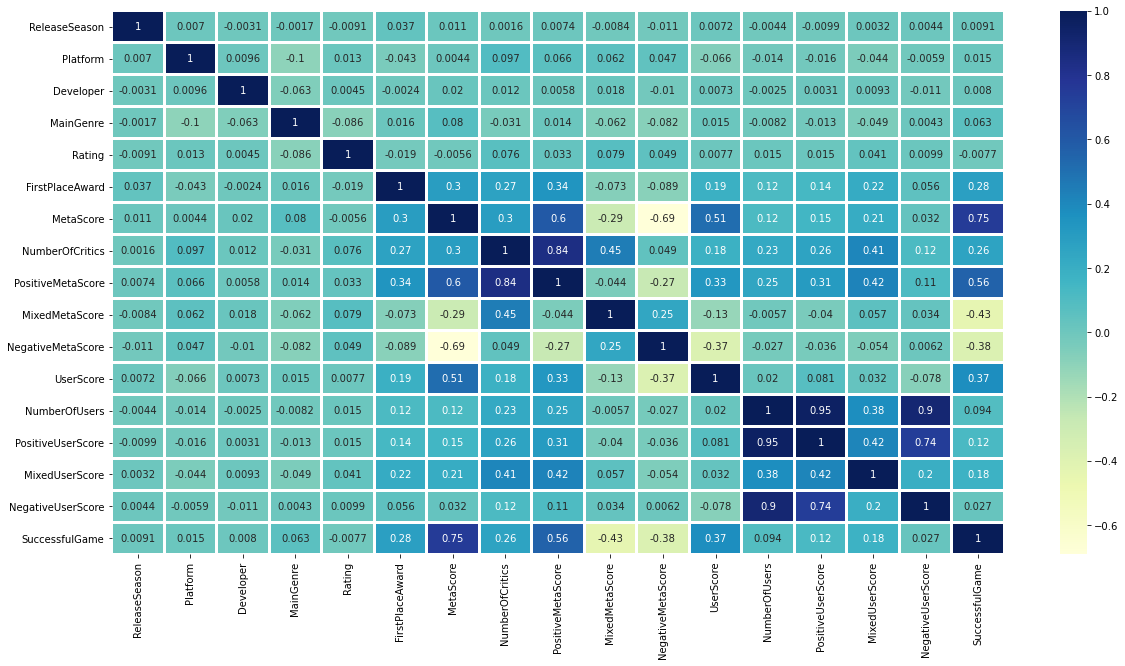

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(dataFrameForML.corr(),annot=True,linewidth=2, linecolor='w',cmap="YlGnBu")
dataFrameForML.corr()

<h2>From the above plot we can see a strong correlation</h2>


## for example between:
<li>MetaScore vs UserScore - 0.51</li>
<li>MetaScore vs PositiveMetaScore - 0.6</li>


<h2>
Scaling Data
</h2>

Converting all the Attributes to be on the same scale in range of [0-1]

In [7]:
scaler = MinMaxScaler()
dataFrameForML = pd.DataFrame(scaler.fit_transform(dataFrameForML),columns=dataFrameForML.columns)
dataFrameForML.head()

,ReleaseSeason,Platform,Developer,MainGenre,Rating,FirstPlaceAward,MetaScore,NumberOfCritics,PositiveMetaScore,MixedMetaScore,NegativeMetaScore,UserScore,NumberOfUsers,PositiveUserScore,MixedUserScore,NegativeUserScore,SuccessfulGame
0,0.666667,0.238095,0.576973,0.083333,0.142857,1.0,1.000000,0.133333,0.184874,0.0,0.0,0.936842,0.042455,0.073189,0.227455,0.006904,1.0
1,0.666667,0.380952,0.568133,0.916667,1.000000,1.0,0.988636,0.108333,0.159664,0.0,0.0,0.757895,0.004717,0.006383,0.088176,0.002013,1.0
2,0.000000,0.476190,0.716473,0.083333,0.571429,1.0,0.988636,0.483333,0.537815,0.0,0.0,0.800000,0.027729,0.037477,0.711423,0.008724,1.0
3,0.666667,0.095238,0.556490,0.000000,1.000000,1.0,0.988636,0.150000,0.201681,0.0,0.0,0.873684,0.002276,0.003651,0.025050,0.000567,1.0
4,0.000000,0.904762,0.716473,0.083333,0.571429,1.0,0.988636,0.666667,0.722689,0.0,0.0,0.810526,0.022560,0.031412,0.537074,0.006606,1.0


In [8]:
X = dataFrameForML.iloc[:,:-1]
y = dataFrameForML['SuccessfulGame']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
logisticsModel = LogisticRegression()
logisticsModel.fit(X_train,y_train)
y_pred = logisticsModel.predict(X_test)


print("Accuracy is:",metrics.accuracy_score(y_test, y_pred))
print("Precision is:",metrics.precision_score(y_test, y_pred))
print("Recall is:",metrics.recall_score(y_test, y_pred))
print("F1 is:",metrics.f1_score(y_test, y_pred))

Accuracy is: 0.976271186440678
Precision is: 0.9736358062538321
Recall is: 0.9706601466992665
F1 is: 0.9721456994184268


,Correct Predictions,InCorrect Predictions
0,3744,91


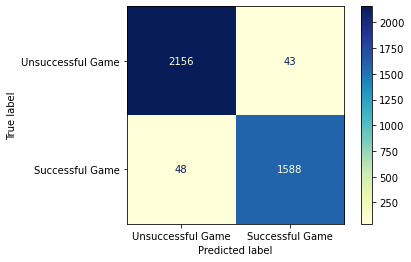

In [10]:
confusionMatrix = metrics.confusion_matrix(y_test, y_pred, labels=logisticsModel.classes_)
(trueNagativ, falsePositive, falseNegative, truePositive) = confusionMatrix.ravel();
matrix = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['Unsuccessful Game','Successful Game'])
matrix.plot(cmap="YlGnBu")
dfCorrects = pd.DataFrame({"Correct Predictions":[trueNagativ + truePositive],"InCorrect Predictions":[falseNegative + falsePositive]})
dfCorrects

In [11]:
dfForSummaryResults = pd.DataFrame({"Test":y_test,"Result":y_pred})
dfForSummaryResults

,Test,Result
9708,0.0,0.0
4166,1.0,1.0
344,1.0,1.0
6174,1.0,1.0
7897,1.0,1.0
...,...,...
17210,0.0,0.0
16311,0.0,0.0
2351,1.0,1.0
12077,0.0,0.0
